In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def assert_orthogonal(v1, v2):
  np.isclose(v1.dot(v2), 0)

def assert_matrix_idempotent(M):
  MM = M @ M
  np.testing.assert_allclose(M, MM)

def projection_matrix(basis):
  B = basis.T
  BTB = B.T @ B
  return B @ np.linalg.inv(BTB) @ B.T

def project(x, basis):
  x_col = np.array([x]).T
  P = projection_matrix(basis)
  return (P @ x).ravel()

# One-Dimensional Subspace (Straight Line)

In [125]:
basis = np.random.uniform(-10, 10, (1, 2))
basis

array([[-4.43541355,  8.92643838]])

In [126]:
def plot_vector_space(basis):
  x = np.linspace(-20, 20, 5)
  f = np.outer(x, basis)
  plt.plot(f[:, 0], f[:, 1], color='black')

def plot_segment(p, q):
  endpoints = np.array([p, q])
  plt.scatter(endpoints[:, 0], endpoints[:, 1], color='red')
  plt.plot(endpoints[:, 0], endpoints[:, 1], color='red')

In [127]:
assert_matrix_idempotent(projection_matrix(basis))

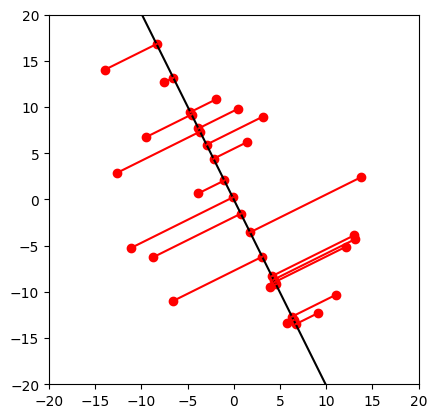

In [133]:
_, ax = plt.subplots()

ax.set_box_aspect(1)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plot_vector_space(basis)

for _ in range(20):
  point = np.random.uniform(-15, 15, 2)
  projection = project(point, basis)
  plot_segment(point, projection)

  displacement = projection - point
  for b in basis:
    assert_orthogonal(displacement, b)

# N-Dimensional Subspace

In [150]:
basis = np.array([
  [1, 0, 0, 0, 0],
  [0, 2, 0, 0, 0],
  [0, 0, 3, 4, 0]
])

In [151]:
assert_matrix_idempotent(projection_matrix(basis))

In [152]:
for _ in range(5000):
  point = np.random.uniform(-1000, 1000, 5)
  projection = project(point, basis)
  displacement = projection - point
  for b in basis:
    assert_orthogonal(displacement, b)